In [52]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv('customer_churn_dataset-training-master.csv')

In [54]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [55]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [56]:
df[df.isnull().any(axis=1)] #Код, который находит строку с NaN

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df = df.drop(index = 199295)

In [58]:
df[df.isnull().any(axis=1)] #Код, который находит строку с NaN

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [59]:
import pandas as pd
import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

df2 = df.copy()
labelEncoder = LabelEncoder()
lists_for_encode = ['Gender', 'Subscription Type', 'Contract Length']

for column in lists_for_encode:
    df2[column] = labelEncoder.fit_transform(df2[column])




In [60]:
df2.value_counts()

CustomerID  Age   Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  Subscription Type  Contract Length  Total Spend  Last Interaction  Churn
2.0         30.0  0       39.0    14.0             5.0            18.0           2                  0                932.00       17.0              1.0      1
301011.0    31.0  1       26.0    8.0              0.0            18.0           2                  0                874.98       15.0              0.0      1
301009.0    44.0  1       28.0    30.0             3.0            14.0           0                  2                551.83       17.0              0.0      1
301008.0    46.0  1       19.0    27.0             0.0            17.0           1                  2                930.38       10.0              0.0      1
301007.0    37.0  1       41.0    3.0              0.0            5.0            0                  0                897.63       25.0              0.0      1
                                                   

In [61]:
df2.dtypes

CustomerID           float64
Age                  float64
Gender                 int32
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type      int32
Contract Length        int32
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


for_x = df2.drop(['Churn', 'CustomerID'], axis=1)
x = for_x
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

model = GaussianNB()
model.fit(X_train, y_train)

#Обучили модель!!!

# accuracy = accuracy_score(X_test, y_test)
model.score(X_test, y_test)

y_pred = model.predict(X_test)
 
print("Accurcy: ", accuracy_score(y_test, y_pred))                 # Predicting the results
print(metrics.classification_report(y_test, y_pred))

# К следующим выходным

Accurcy:  0.9095801693386945
              precision    recall  f1-score   support

         0.0       0.86      0.94      0.90     75959
         1.0       0.95      0.89      0.92    100374

    accuracy                           0.91    176333
   macro avg       0.91      0.91      0.91    176333
weighted avg       0.91      0.91      0.91    176333



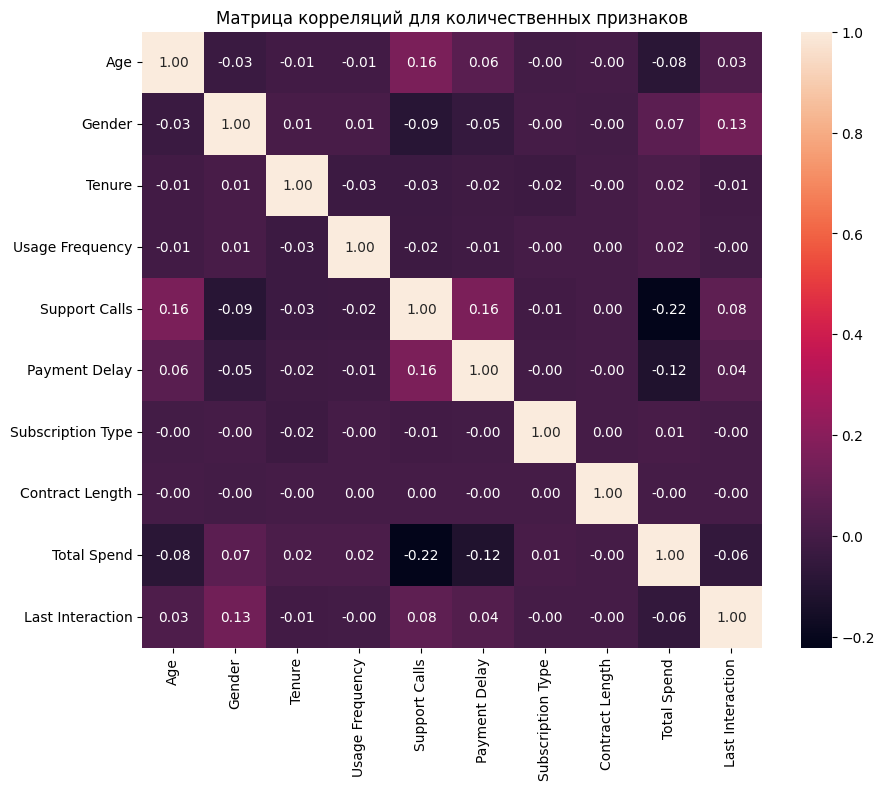

In [63]:
corr_matrix = for_x.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Матрица корреляций для количественных признаков')
plt.show()

In [64]:
predict = df2.copy()
predict['predicted_exited'] = model.predict(for_x)
predict

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,predicted_exited
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0,1.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0,1.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0,1.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0,1.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0,0.0,0.0
440829,449996.0,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0,0.0,0.0
440830,449997.0,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0,0.0,0.0
440831,449998.0,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0,0.0,0.0


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

tree.score(X_test, y_test)

y_pred = tree.predict(X_test)
 
print("Accurcy: ", accuracy_score(y_test, y_pred))                 
print(metrics.classification_report(y_test, y_pred))


# print(confusion_matrix(X_test, y_pred))



Accurcy:  0.9996597347064928
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     75959
         1.0       1.00      1.00      1.00    100374

    accuracy                           1.00    176333
   macro avg       1.00      1.00      1.00    176333
weighted avg       1.00      1.00      1.00    176333



In [75]:
#Градиентый бустинг
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials #К следующим выходным




boost = GradientBoostingClassifier(
    # n_estimators=100,  
    # learning_rate=0.1,  
    # max_depth=3  
)

boost.fit(X_train, y_train)

score = boost.score(X_test, y_test)

y_pred = boost.predict(X_test)
 
print("Accurcy: ", accuracy_score(y_test, y_pred))                 # Predicting the results
print(metrics.classification_report(y_test, y_pred))

# cm = confusion_matrix(y_test, y_pred)
# feature_importances = boost.feature_importances_ #К выходным следующим
# score

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.5],
#     'max_depth': [2, 3, 4]
# }

# grid_search = GridSearchCV(boost, param_grid, cv=5)

# grid_search.fit(X_train, y_train)

# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# best_accuracy = best_model.score(X_test, y_test)
# best_accuracy

Accurcy:  0.9969546256231108
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     75959
         1.0       1.00      0.99      1.00    100374

    accuracy                           1.00    176333
   macro avg       1.00      1.00      1.00    176333
weighted avg       1.00      1.00      1.00    176333

